Logistic Regression is an *extension* of *Linear regression*, except that, here, the dependent variable is categorical and not continuous. It predicts the **probability** of the outcome variable. <br> <br>
So, Logistic Regression in one of the machine learning algorithm to solve **binary classification** problem. <br> 
Some real life classification examples would be
* to classify the mail as spam or not spam
* to classify the transaction as fraudulent or genuine
* whether a person will buy insurance or not <br>
In the above examples Logistic Regression estimates the **probability** of an event occurring i.e either mail is spam **(1)** or not spam **(0)**.





## Mathematics behind logistic regression
Suppose we have a dataset of whether a person will buy insurance or not. In the dependent variable(bought_insurance), **1** means *he will buy insurance* i.e a *positive class* and **0** means *he will not buy insurance* i.e a *negative class*. 


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score 
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
#dataset
data= pd.read_csv("../input/insurance-dataset/insurance_data.csv")
data.head()

If we plot this dataset, we can see that all the points lie on 0 and 1

In [ ]:
# plot
plt.figure(figsize= (9,4))
plt.scatter(data["age"], data['bought_insurance'])
plt.xlabel("age", fontsize=14)
plt.ylabel("insurance ?: 0=No and 1=Yes", fontsize=14)

Seeing the plot we find that there is nothing special about the dependent variable aside from being binary. So we try using Linear Regression by assuming the threshold value as 0.5. Which means that if the **probability(yes) >= 0.5**, the person will buy the insurance and if  **probability(yes) < 0.5**, the person will not buy the insurance.

In [ ]:
# separating independent and dependent variable
x= data[["age"]]
y= data[["bought_insurance"]]

# defining Linear Regression model
from sklearn.linear_model import LinearRegression
reg= LinearRegression()

# fitting the model
reg.fit(x,y)

In [ ]:
# plotting best fit line
plt.figure(figsize= (9,4))
plt.scatter(data["age"], data['bought_insurance'])
plt.plot(data["age"], reg.predict(x), color="orange")
plt.xlabel("age", fontsize=14)
plt.ylabel("insurance: 0=No and 1=Yes", fontsize=14)
plt.legend([ "best fit regression line", "actual"])

### intercept and coefficient of regression line

In [ ]:
print("intercept :", reg.intercept_)
print("coefficient :", reg.coef_)

## Problem in using Linear Regression
### Problem 1.
On the best fit line if we try to find whether the person with age=15 and age=75 will buy the insurance or not, we are getting the probability as negative and greater than 1 respectively.<br> And since the probability always lie between 0 and 1, it can never be negative or >1, Linear Regression cannot be used here.

In [ ]:
# probability for age 15 and 75
print("probability(yes=15) is" , reg.predict([[15]]))
print("probability(yes=75) is" , reg.predict([[75]]))

### Problem 2.
In case the dataset contains outliers.

In [ ]:
# creating same dataset with outlier
data.to_csv("insurance_data(with_outlier).csv", index=False)

In [ ]:
# to create an outlier, I have added a data point for age=120 and 1 as the corresponding output
import csv

with open("insurance_data(with_outlier).csv", "a") as csvfile:
    writer= csv.writer(csvfile)
    writer.writerow([120,1])  

In [ ]:
# same dataset with outliers
data2= pd.read_csv("insurance_data(with_outlier).csv")
data2.tail()

In [ ]:
# fitting linear regression model on the new dataset with outlier
reg2= LinearRegression()
reg2.fit(data2[["age"]], data2[["bought_insurance"]])

In [ ]:
plt.figure(figsize= (9,4))
plt.scatter(data2[["age"]], data2[["bought_insurance"]])
plt.plot(data2[["age"]], reg2.predict(data2[["age"]]), color="orange")
plt.xlabel("age", fontsize=14)
plt.ylabel("insurance: 0=No and 1=Yes", fontsize=14)
plt.legend([ "best fit regression line", "actual"])

# intercept and coefficient of regression line
print("intercept :", reg2.intercept_)
print("coefficient :", reg2.coef_)

From the plot we can see that because of the outlier, both the ***intercept*** and the ***coefficient*** is changed resulting in the ***shift of regression line***.<br> Now some datapoints which were in *positive class* (probability(yes)>= 0.5) comes in *negative class* (probability(yes)< 0.5), giving the incorrect prediction.

In [ ]:
print("probability(yes=40) without outlier was {}. This person was buying the insurance.".format(reg.predict([[40]])))
print("probability(yes=40) with outlier is {}. Now this person will not buy the insurance.".format(reg2.predict([[40]])))

###### In short:
probability (p)= f(x), a linear function where x is an independent variables.<br> But we need to constrain probability (p) such that 0<= p <=1.


## Solving the above problems of using Linear Regression
Let’s consider y as linear function in the above univariate regression model, where x = independent variable and y = dependent variable.
$${y} = {\beta}_{0} + {\beta}_{1}x $$ 

$${probability (p)} = f(x) = {\beta}_{0} + {\beta}_{1}x $$ 
###### To make probability(p) >= 0
The exponential of any number always gives the positive value. Now the probability (p) becomes

$${p} = e^{f(x)} = e^{ {\beta}_{0} + {\beta}_{1}x } $$ 
###### To make probability(p) < 1
Dividing any number by a number which is slightly greater than it gives a value less than 1. Now the probability (p) becomes

$${p} = \frac{ e^{f(x)}}  {1 + e^{f(x)} }   = \frac{ e^{ {\beta}_{0} + {\beta}_{1}x } }  {1 + e^{ {\beta}_{0} + {\beta}_{1}x }  }$$ 

$$ or $$

$${p} = \frac{1}  {1 + e^{- ({\beta}_{0} + {\beta}_{1}x) }  }$$

$$ Sigmoid Function $$

***This Sigmoid Function will also take care of Outliers***
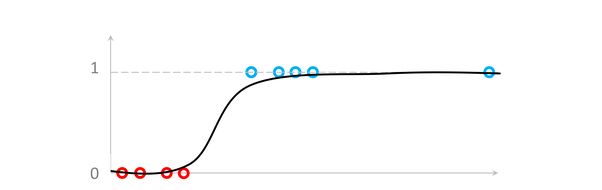

On solving the Sigmoid Function we get
$$\frac{p}{1-p} = e^{ {\beta}_{0} + {\beta}_{1}x }$$

$$ log(\frac{p}{1-p}) = {\beta}_{0} + {\beta}_{1}x $$

$$ log(odds) = {\beta}_{0} + {\beta}_{1}x $$, here p / (1-p) = probability of odds

$$logit (p) = {\beta}_{0} + {\beta}_{1}x$$
 And, log(probability of odd)= logit transformation of probability

From above equatioin,
### The *logit* of *probability* gives the linear regression and hence the name LOGISTIC REGRESSION

# Logistic Regression in python
Starting with Titanic dataset. In this dataset we have to predict whether a passenger will survive or not.

In [ ]:
# upload dataset
df= pd.read_csv("../input/titanicdataset-traincsv/train.csv")

# shape of dataset
print("dataset shape:", df.shape)
df.head()

## Exploratory data analysis

In [ ]:
gs= gridspec.GridSpec(2,2)
plt.figure(figsize=(15,12))

plt.style.use('fivethirtyeight')
ax=pl.subplot(gs[0,0])
sns.countplot(x= "Survived", data=df, palette="husl")


ax=pl.subplot(gs[0,1])
sns.countplot(x="Survived", hue="Sex", data=df)

ax=pl.subplot(gs[1,0])
sns.countplot(x="Survived", hue="Pclass", data=df)

ax= pl.subplot(gs[1,1])
sns.countplot(x= "Survived", hue="Embarked", data=df, palette="husl")

In [ ]:
# percentage survived
df["Survived"].value_counts()/ len(df)*100

### Observations
- Only 38% of passengers survived
- Females survived in higher proportion than males
- Passengers who survived mostly belonged to First Class and that who did not survive mostly belonged to Third class

## Data Preprocessing

## Handling missing values

In [ ]:
df.isnull().sum()

### Missing values in `Age` column

Whether to fill missing values of `Age` with *mean* or *median*, first find out if `Age` has outliers.

In [ ]:
sns.boxplot(df["Age"])

Since `Age` has outliers, we will fill the missing values with the *median* because outliers can have significant change in the *mean*

In [ ]:
# function to impute median
def impute_age(dataframe, feature, median):
    dataframe[feature]= dataframe[feature].fillna(median)

In [ ]:
impute_age(df, "Age", df["Age"].median())

### Missing values in `Cabin ` column

Since `Cabin` has over 77% of missing values, we can drop it because it will not going to add any predictive power to our model.

In [ ]:
print("percentage of missing values in Cabin :",df["Cabin"].isnull().mean() )

df.drop(columns= ["Cabin"], axis=1, inplace= True)

### Missing values in `Embarked  ` column

Since there are only two missing values, we will impute them with the mode of the Embarked column.

In [ ]:
# function to impute mode
def impute_mode(dataframe, feature):
    dataframe[feature]= dataframe[feature].fillna(dataframe[feature].mode()[0])

In [ ]:
impute_mode(df, "Embarked")

## Check for class imbalance

In [ ]:
sns.countplot(df["Survived"])
plt.title("target variable")

In [ ]:
print("percentage of class in target:\n", df["Survived"].value_counts()/ len(df)*100)

The class distribution in the target variable is 61:38 indicating a *balanced dataset*

## Droping unnecessary columns

In [ ]:
df.drop(columns= ["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

## Encoding categorical features

In [ ]:
# encoding categorical fetaures
df= pd.get_dummies(df, drop_first=True)

# dummy encoded dataset
df.head()

### Separating features and target 

In [ ]:
# features
x= df.iloc[:, 1:]

# target
y= df.iloc[:, 0]

### Splitting train and test datset

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=10)

In [ ]:
# selecting the classifier
reg= LogisticRegression()

# fitting model on train data
reg.fit(x_train, y_train)

In [ ]:
# checking model performance
y_predicted= reg.predict(x_test)

cm= confusion_matrix(y_test, y_predicted)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))